In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = pd.read_csv('../input/rainfall-prediction/dataset1.csv')

In [3]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [4]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
# remove attribute 'day'
dataset.drop(['day'],axis=1,inplace=True)
dataset.shape

(366, 11)

In [6]:
dataset['rainfall'].value_counts()

yes    249
no     117
Name: rainfall, dtype: int64

In [7]:
multi_label = pd.DataFrame(dataset.rainfall)
le = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le.fit_transform)
dataset['rainfall'] = enc_label
dataset

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  365 non-null    float64
 10  windspeed               365 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [9]:
dataset['windspeed'] = dataset['windspeed'].fillna(0)

In [10]:
dataset['         winddirection'] = dataset['         winddirection'].fillna(0)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  366 non-null    float64
 10  windspeed               366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [12]:
y_train= dataset[['rainfall']]
X_train= dataset.drop(labels=['rainfall'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (366, 10) 
y_train has shape: (366, 1)


In [13]:
y=y_train
x=X_train

In [14]:
dataset['rainfall'].value_counts()

1    249
0    117
Name: rainfall, dtype: int64

In [15]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
 
 

In [16]:
y=np.array(y, dtype=np.int64)
x=np.array(x, dtype=np.int64)
x

array([[1025,   19,   18, ...,    9,   80,   26],
       [1022,   21,   18, ...,    0,   50,   15],
       [1019,   20,   19, ...,    0,   40,   14],
       ...,
       [1025,   18,   17, ...,    4,   70,   33],
       [1025,   19,   17, ...,    1,   20,   20],
       [1026,   20,   17, ...,    5,   20,   23]])

In [17]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [18]:
counter = Counter(y)
print(counter) 

Counter({1: 249, 0: 249})


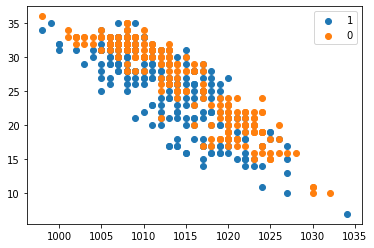

In [19]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [20]:
X_train=np.array(x)
y_train=np.array(y)
 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=42)


In [22]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(398, 10, 1)

In [24]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(100, 10, 1)

In [25]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  366 non-null    float64
 10  windspeed               366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [26]:
def create_model():    
    from keras.layers import LSTM
    model = Sequential()
    model.add(LSTM(units = 256, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(LSTM(units = 128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
    return model  

In [27]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#model= model.compile(loss="binary_crossentropy", metrics=['accuracy'])
model = KerasClassifier(create_model, verbose=0, )


In [ ]:
batch_size = [5,10, 20, 30]
epochs = [100,120,150,200]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2022-10-31 01:00:47.914366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:00:47.916369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:00:47.951740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:00:47.952766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:00:48.075968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
    model = Sequential()
    model.add(LSTM(units = 256, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(LSTM(units = 128))
    model.add(Dense(1, activation='sigmoid'))
     
 

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5,validation_split=0.2)


In [ ]:
score =model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")